# Clustering
In this file, instructions how to approach the challenge can be found.

We can use different types of clustering algorithms:

- KMeans
- Hierarchical
- DBScan

In [1]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import Kmodes
from kmodes.kmodes import KModes

# import KPrototypes
from kmodes.kprototypes import KPrototypes

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

# import ployly to ploy 3D cluster graph
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

# Import seaborn
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

# Import module for data visualization
from plotnine import *
import plotnine

from sklearn import metrics

# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# import DBSCAN
from sklearn.cluster import DBSCAN

import warnings

warnings.filterwarnings('ignore')

from geopy.geocoders import Nominatim
import folium # map rendering library

import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors # Matplotlib and associated plotting modules

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

## Read the data from the csv files

In [285]:
neighborhood = pd.read_csv('data/nyc_neighborhood.csv')

<AxesSubplot:>

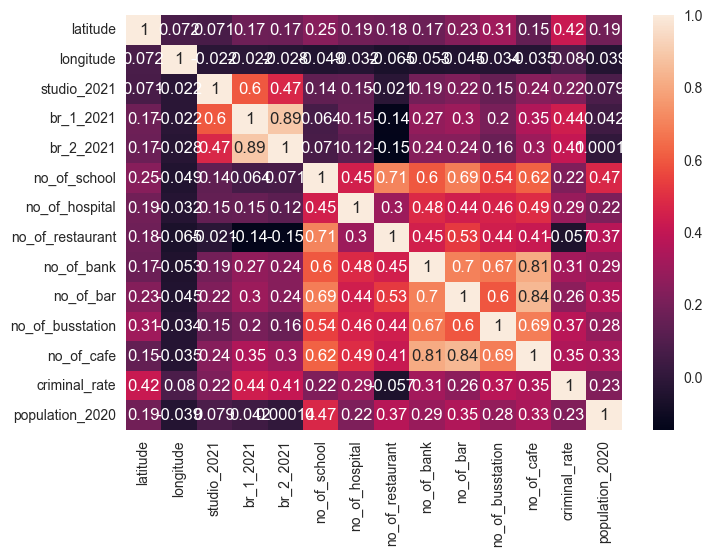

In [286]:
cor = neighborhood.corr()
sns.heatmap(cor,annot=True)

In [ ]:
#############################################################################
## WED OK Setting (0.21884600140630495, 90.19465243141117) ##################
#############################################################################
# features = ['no_of_busstation', 'no_of_school', 'no_of_bank', 'criminal_rate', 'br_1_2021', 'population_2020', 'no_of_hospital']
# df_neighborhood = neighborhood[features]
# df_neighborhood['criminal_rate'] = neighborhood['criminal_rate']/neighborhood['population_2020']
# df_neighborhood['no_of_bank'] = neighborhood['no_of_bank']/neighborhood['population_2020']
# df_neighborhood['no_of_school'] = neighborhood['no_of_school']/neighborhood['population_2020']
# df_neighborhood['no_of_hospital'] = neighborhood['no_of_hospital']/neighborhood['population_2020']
# df_neighborhood['no_of_busstation'] = neighborhood['no_of_busstation']/neighborhood['population_2020']
# scaler = MinMaxScaler()
# df_neighborhood = scaler.fit_transform(df_neighborhood)
# df_neighborhood = pd.DataFrame(df_neighborhood, columns=features)
# elbow_k = 4

# fig.update_layout(
#   polar=dict(
#     radialaxis=dict(
#       visible=True,
#       range=[0, 3]
#     )),
#   showlegend=False
# )

In [ ]:
#################################################################################################################################################################
## Max silhouette score setting (Silhouette Score: 0.9772393502551746, Calinski Harabasz Score: 63847.989925862006) #############################################
#################################################################################################################################################################
# features = ['br_1_2021', 'no_of_school', 'no_of_hospital', 'no_of_busstation', 'criminal_rate', 'population_2020']
# df_neighborhood = neighborhood[features]
# neighborhood['criminal_rate'] = neighborhood['criminal_rate']/neighborhood['population_2020']
# df_neighborhood['no_of_school'] = neighborhood['no_of_school'].apply(lambda x: 1 if x >= neighborhood['no_of_school'].mean() else 0)
# df_neighborhood['no_of_hospital'] = neighborhood['no_of_hospital'].apply(lambda x: 1 if x >= neighborhood['no_of_hospital'].mean() else 0)
# df_neighborhood['no_of_busstation'] = neighborhood['no_of_busstation'].apply(lambda x: 1 if x >= neighborhood['no_of_busstation'].mean() else 0)
# scaler = MinMaxScaler()
# df_neighborhood = scaler.fit_transform(df_neighborhood)
# df_neighborhood = pd.DataFrame(df_neighborhood, columns=features)
# df_neighborhood_model = df_neighborhood.copy()
# df_neighborhood_model = PCA(n_components=3).fit_transform(df_neighborhood)
# df_neighborhood_model = pd.DataFrame(df_neighborhood_model)

In [287]:
#features = ['studio_2021', 'br_1_2021', 'br_2_2021', 'no_of_school', 'no_of_hospital', 'no_of_restaurant', 'no_of_bank', 'no_of_bar', 'no_of_busstation', 'no_of_cafe', 'criminal_rate', 'population_2020']
features = ['br_1_2021', 'no_of_school', 'no_of_hospital', 'no_of_busstation', 'criminal_rate', 'population_2020']
features_dis = ['Rent Prices (1 bed)', 'No of Schools', 'No of Hospitals', 'No of Bus Stations', 'Crime Rate', 'Population']
df_neighborhood = neighborhood[features]

In [288]:
df_neighborhood['criminal_rate'] = neighborhood['criminal_rate']/neighborhood['population_2020']
df_neighborhood['no_of_school'] = neighborhood['no_of_school']/neighborhood['population_2020']
df_neighborhood['no_of_hospital'] = neighborhood['no_of_hospital']/neighborhood['population_2020']
df_neighborhood['no_of_busstation'] = neighborhood['no_of_busstation']/neighborhood['population_2020']

# df_neighborhood['no_of_school'] = neighborhood['no_of_school'].apply(lambda x: 1 if x >= neighborhood['no_of_school'].mean() else 0)
# df_neighborhood['no_of_hospital'] = neighborhood['no_of_hospital'].apply(lambda x: 1 if x >= neighborhood['no_of_hospital'].mean() else 0)
# df_neighborhood['no_of_busstation'] = neighborhood['no_of_busstation'].apply(lambda x: 1 if x >= neighborhood['no_of_busstation'].mean() else 0)

#df_neighborhood['no_of_bank'] = neighborhood['no_of_bank']/neighborhood['population_2020']
#df_neighborhood['no_of_restaurant'] = neighborhood['no_of_restaurant']/neighborhood['population_2020']
#df_neighborhood['no_of_cafe'] = neighborhood['no_of_cafe']/neighborhood['population_2020']
#df_neighborhood['no_of_bar'] = neighborhood['no_of_bar']/neighborhood['population_2020']
#df_neighborhood['no_of_bank'] = df_neighborhood['no_of_bank'].apply(lambda x: 1 if x >= neighborhood['no_of_bank'].mean() else 0)
#df_neighborhood['no_of_school'] = df_neighborhood['no_of_school'].apply(lambda x: 1 if x >= neighborhood['no_of_school'].mean() else 0)
#df_neighborhood['no_of_hospital'] = df_neighborhood['no_of_hospital'].apply(lambda x: 1 if x >= neighborhood['no_of_hospital'].mean() else 0)
#df_neighborhood['no_of_restaurant'] = df_neighborhood['no_of_restaurant'].apply(lambda x: 1 if x >= neighborhood['no_of_restaurant'].mean() else 0)
#df_neighborhood['no_of_cafe'] = df_neighborhood['no_of_cafe'].apply(lambda x: 1 if x >= neighborhood['no_of_cafe'].mean() else 0)

<AxesSubplot:>

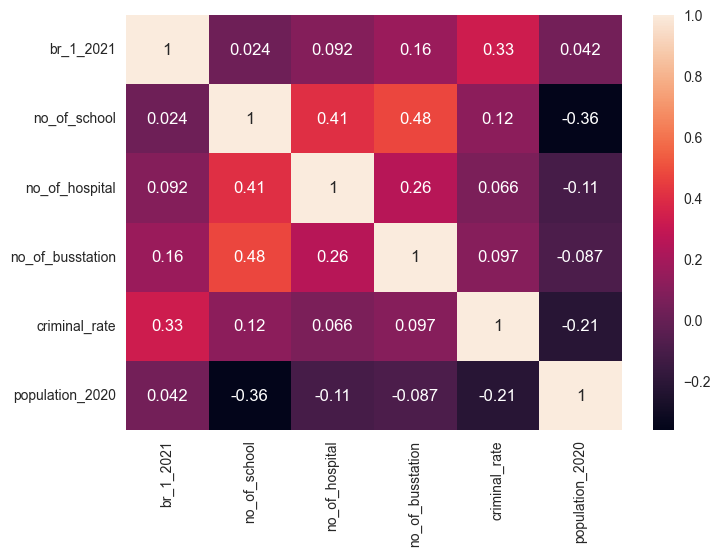

In [289]:
cor = df_neighborhood.corr()
sns.heatmap(cor,annot=True)

In [291]:
# Normalize the continuous values
#scaler = StandardScaler()
scaler = MinMaxScaler()
df_neighborhood = scaler.fit_transform(df_neighborhood)
df_neighborhood = pd.DataFrame(df_neighborhood, columns=features)
df_neighborhood_model = df_neighborhood.copy()


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████████████████████████████████████| 23/23 [00:00<00:00, 191.74it/s]

[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [4].
[clusteval] >Fin.
[clusteval] >Estimated number of n_clusters: 4, average silhouette_score=0.384


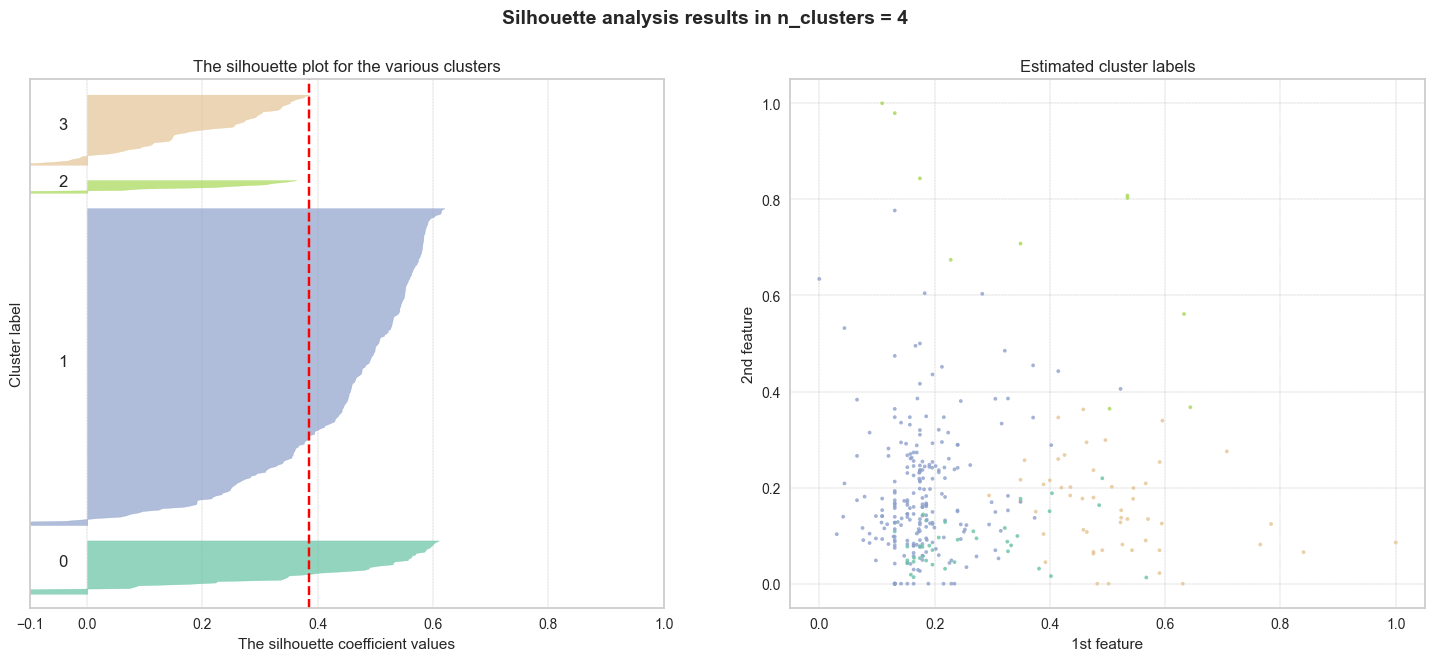

In [292]:
###################################################
## Convert the selected features into PCAs ########
###################################################

df_neighborhood_model = PCA(n_components=3).fit_transform(df_neighborhood)

df_neighborhood_model = pd.DataFrame(df_neighborhood_model)

# Import library
from clusteval import clusteval

# Set parameters, as an example dbscan
ce = clusteval()

# Fit to find optimal number of clusters using dbscan
results= ce.fit(df_neighborhood.to_numpy())

# Make plot of the cluster evaluation
#ce.plot(df_neighborhood.to_numpy())

# Make scatter plot. Note that the first two coordinates are used for plotting.
ce.scatter(df_neighborhood.to_numpy())

# results is a dict with various output statistics. One of them are the labels.
cluster_labels = results['labx']

## K-means Clustering

In [293]:
# Elbow Method for K means
def apply_elbow(model, df):
    # k is range of number of clusters.
    visualizer = KElbowVisualizer(model, k=(2,8), timings= True)
    visualizer.fit(df)        # Fit data to visualizer
    visualizer.show()        # Finalize and render figure
    return visualizer.elbow_value_

# Apply kmean for the dataset
def kmean_fit_and_predict(no_of_clusters, initial_runs, df):
    km = KMeans(n_clusters=no_of_clusters, # how many clusters we expected 
                n_init=initial_runs, # how many initial runs
                random_state=0)
    X = df.to_numpy()

    # fit and predict
    return  km.fit_predict(X)

def PCA_plot_2d(df, cluster, title):
    """
    Run PCA on the data and reduce the dimensions in pca_num_components dimensions
    
    PARAMS:
        df (pd.DataFrame): dataframe with filtered features including clustering results as column 'cluster'
    RETURN: 
        2d visualization of segmentations using scatter plot by reducing dimentions with PCA.
    """
    
    df_2d = PCA(n_components=2).fit_transform(df)
    data = pd.DataFrame(df_2d, columns=['PCA1','PCA2'])
    data['cluster'] = cluster

    sns.scatterplot(x='PCA1',
                    y='PCA2',
                    hue=data['cluster'],
                    palette='deep',
                    data=data)
    plt.title(title)
    plt.show()
    
def print_radar(r):
    df_r = pd.DataFrame(dict(r=r,
                             theta=features))
    fig = px.line_polar(df_r, r='r', theta='theta', line_close=True)
    fig.show()
    
def get_radar_value_by_std(x, mean):
    if x - mean >= 2:
        return 5
    elif x - mean > 1 and x - mean <= 2:
        return 4
    elif x - mean > 0 and x - mean <= 1:
        return 3
    elif x - mean > -1 and x - mean <= 0:
        return 2
    elif x - mean > -2 and x - mean <= -1:
        return 1
    else:
        return 0
    
def get_radar_value_by_rescale(x, min_value, max_value):
    return round( (x - min_value) /  ((max_value - min_value)/5) )

Silhouette Score: 0.290603158155511
Calinski Harabasz Score: 174.59486619519467


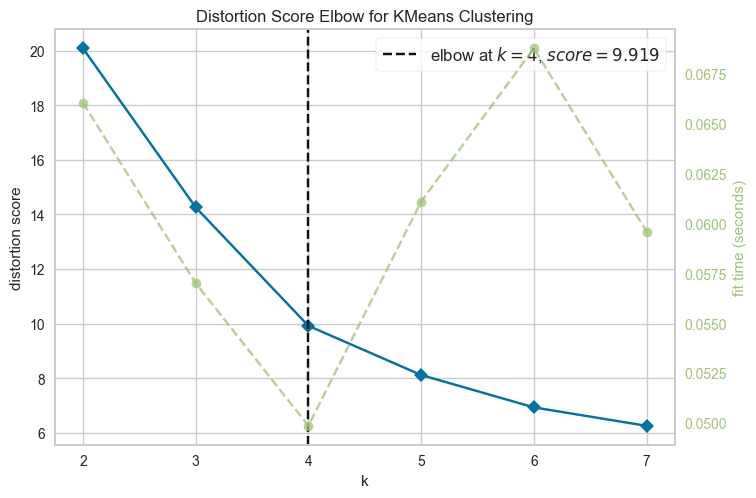

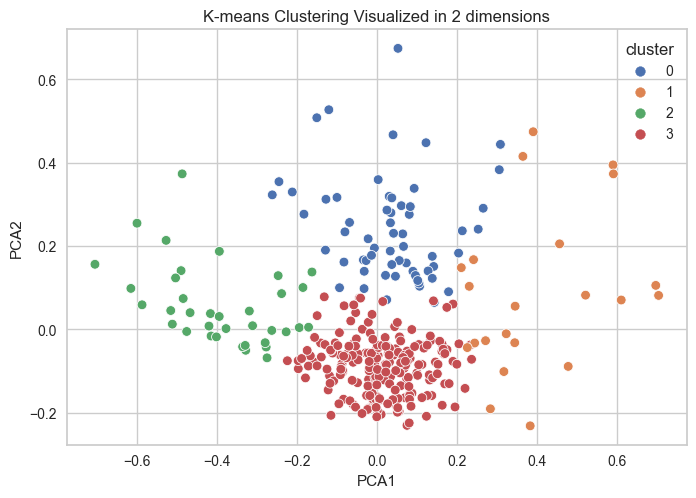

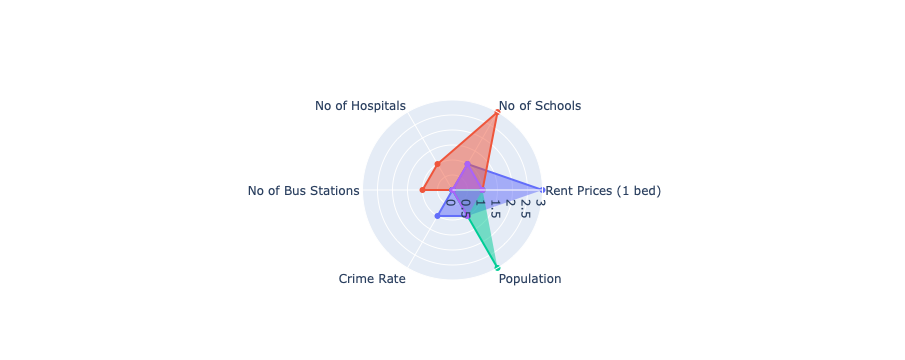

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [298]:
###################################################
## Modeling #######################################
###################################################

df_kmean = df_neighborhood_model.copy()

my_model = KMeans().fit(df_kmean.to_numpy())
labels = my_model.labels_
print('Silhouette Score:', metrics.silhouette_score(df_kmean,labels))
print('Calinski Harabasz Score:', metrics.calinski_harabasz_score(df_kmean, labels))

model = KMeans() # setup the model 
elbow_k = apply_elbow(model, df_kmean) # use the k value returned by the Elbow Method
if elbow_k is None:
     elbow_k = 3
                
kmean_cluster = kmean_fit_and_predict(elbow_k, 5, df_kmean)

PCA_plot_2d(df_kmean, kmean_cluster, 'K-means Clustering Visualized in 2 dimensions')
df_kmean = df_neighborhood.copy()
df_kmean['cluster'] = kmean_cluster



###################################################
## Print the radar chart ##########################
###################################################

categories = features

fig = go.Figure()

max_r = 0
    
for i in set(df_kmean['cluster']):
    r = []
    
    for j in categories:
        #r.append(get_radar_value_by_std(df_kmean[df_kmean['cluster'] == i][j].mean(), df_neighborhood[j].mean()))
        r.append(get_radar_value_by_rescale(df_kmean[df_kmean['cluster'] == i][j].mean(), df_neighborhood[j].min(), df_neighborhood[j].max()))
    
    fig.add_trace(go.Scatterpolar(
          r=r,
          theta=features_dis,
          fill='toself',
          name='Cluster'+str(i)
    ))
    
    if max(r) > max_r:
        max_r = max(r)

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, max_r]
    )),
  showlegend=False
)

fig.show()


###################################################
## Print the map ##################################
###################################################

# get NYC latitude and longitude

address = 'New York City, NY'
location = None

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
nyc_latitude = location.latitude
nyc_longitude = location.longitude

print('The geograpical coordinate of New York City are {}, {}.'.format(nyc_latitude, nyc_longitude))


# create map
map_clusters = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, elbow_k))
if elbow_k > 5:
    rainbow = [colors.rgb2hex(i) for i in colors_array]
else:
    ## blue: 3471EB, red: BB0000, green: 00BB00, purple: 6E34EB, orange: EBA134
    rainbow = ['#EBA134', '#00BB00', '#3471EB', '#6E34EB', '#BB0000'] 
    

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhood['latitude'], neighborhood['longitude'], neighborhood['neighborhood'], df_kmean['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

In [295]:
df_kmean[(df_kmean['cluster'] == 1)].describe()

,br_1_2021,no_of_school,no_of_hospital,no_of_busstation,criminal_rate,population_2020,cluster
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.0
mean,0.264832,0.619574,0.119136,0.211024,0.064461,0.068427,1.0
std,0.171930,0.182023,0.218313,0.253165,0.065788,0.043669,0.0
min,0.000000,0.364211,0.000000,0.000000,0.001098,0.006675,1.0
25%,0.139919,0.476864,0.000000,0.070049,0.020464,0.030420,1.0
50%,0.204560,0.582401,0.066651,0.119538,0.042009,0.068088,1.0
75%,0.365481,0.759556,0.143046,0.236263,0.091561,0.091744,1.0
max,0.632773,1.000000,1.000000,1.000000,0.249358,0.154103,1.0


## Hierarchical Clustering

In [247]:
# define plot_dendrogram function
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

Silhouette Score: 0.3879314419036486
Calinski Harabasz Score: 140.64747632337122


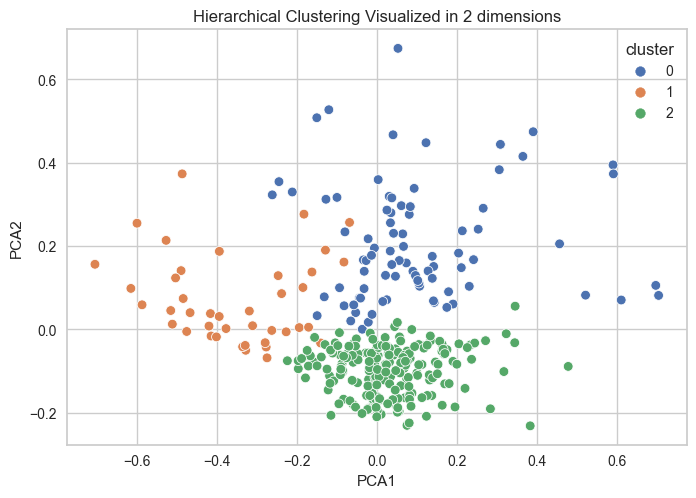

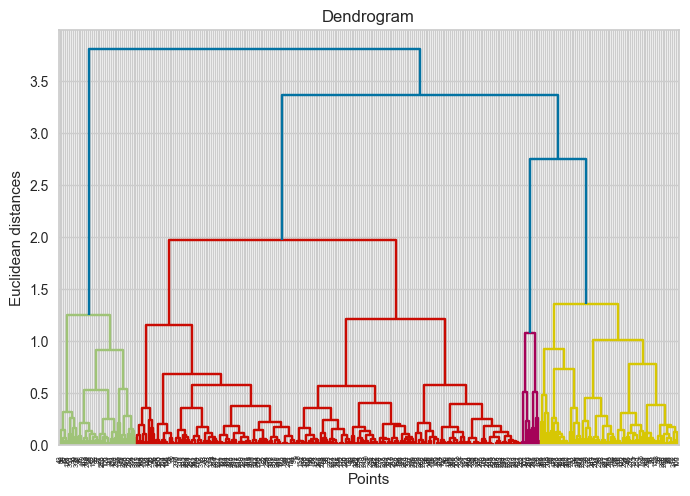

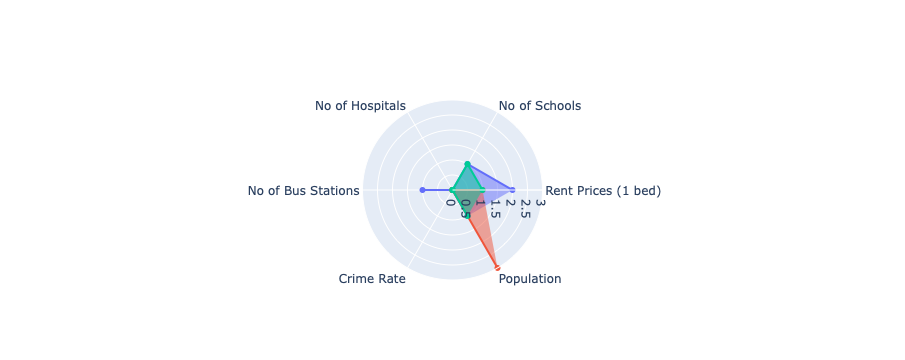

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [299]:
###################################################
## Modeling #######################################
###################################################

# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

#df_hierarchical = df_neighborhood.copy()
df_hierarchical = df_neighborhood_model.copy()

# fit and predict
hierarchical_cluster = ac.fit_predict(df_hierarchical)

labels = ac.labels_
print('Silhouette Score:', metrics.silhouette_score(df_hierarchical,labels))
print('Calinski Harabasz Score:', metrics.calinski_harabasz_score(df_hierarchical, labels))




PCA_plot_2d(df_hierarchical, hierarchical_cluster, 'Hierarchical Clustering Visualized in 2 dimensions')

# Plot dendrogram
plot_dendrogram(df_hierarchical)

df_hierarchical = df_neighborhood.copy()
df_hierarchical['cluster'] = hierarchical_cluster


###################################################
## Plot the radar chart ###########################
###################################################

categories = features

fig = go.Figure()

max_r = 0

for i in set(df_hierarchical['cluster']):
    r = []
    
    for j in categories:
        #r.append(get_radar_value_by_std(df_hierarchical[df_hierarchical['cluster'] == i][j].mean(), df_neighborhood[j].mean()))
        r.append(get_radar_value_by_rescale(df_hierarchical[df_hierarchical['cluster'] == i][j].mean(), df_neighborhood[j].min(), df_neighborhood[j].max()))
    
    
    fig.add_trace(go.Scatterpolar(
          r=r,
          theta=features_dis,
          fill='toself',
          name='Cluster'+str(i)
    ))
    
    if max(r) > max_r:
        max_r = max(r)

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, max_r]
    )),
  showlegend=False
)

fig.show()


###################################################
## Print the map ##################################
###################################################

# get NYC latitude and longitude

address = 'New York City, NY'
location = None

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
nyc_latitude = location.latitude
nyc_longitude = location.longitude

print('The geograpical coordinate of New York City are {}, {}.'.format(nyc_latitude, nyc_longitude))

# create map
map_clusters = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=10)

# set color scheme for the clusters
## blue: 3471EB, red: BB0000, green: 00BB00, purple: 6E34EB, orange: EBA134
rainbow = ['#EBA134', '#3471EB', '#00BB00', '#6E34EB', '#BB0000'] 

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhood['latitude'], neighborhood['longitude'], neighborhood['neighborhood'], df_hierarchical['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

## DBSCAN Clustering

Silhouette Score: 0.1565061972989342
Calinski Harabasz Score: 21.35274655687265


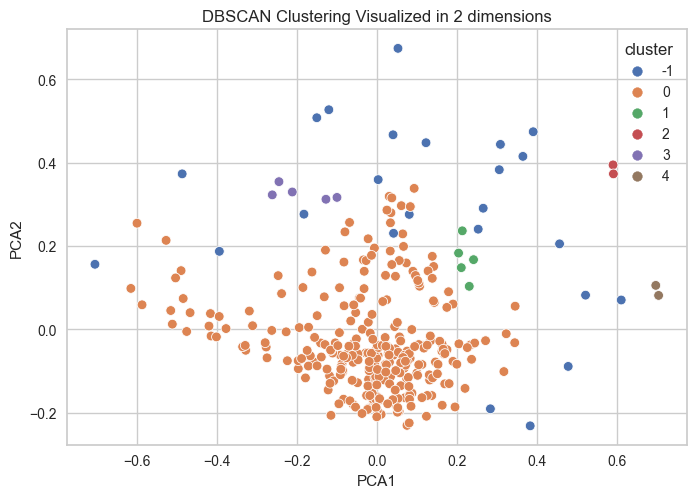

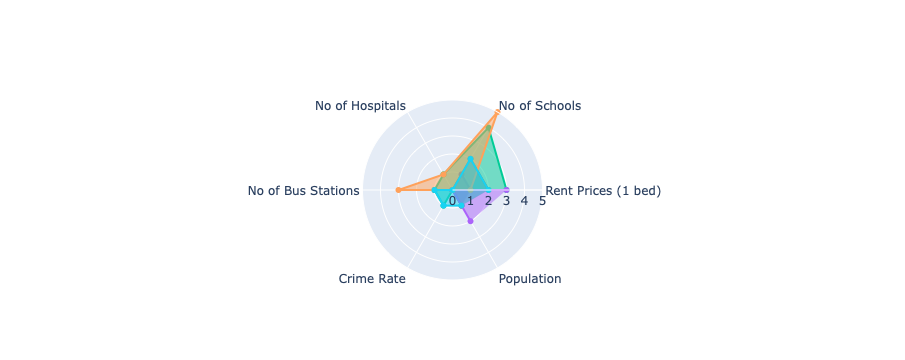

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [300]:
###################################################
## Modeling #######################################
###################################################

db = DBSCAN(eps=0.1,
            min_samples=2,
            metric='euclidean')

df_dbscan = df_neighborhood_model.copy()

# fit and predict
dbscan_cluster = db.fit_predict(df_dbscan)

labels = db.labels_
print('Silhouette Score:', metrics.silhouette_score(df_dbscan,labels))
print('Calinski Harabasz Score:', metrics.calinski_harabasz_score(df_dbscan, labels))

PCA_plot_2d(df_dbscan, dbscan_cluster, 'DBSCAN Clustering Visualized in 2 dimensions')

df_dbscan = df_neighborhood.copy()
df_dbscan['cluster'] = dbscan_cluster



###################################################
## Plot the radar chart ###########################
###################################################

categories = features


fig = go.Figure()

max_r = 0
    
for i in set(df_dbscan['cluster']):
    r = []
    
    for j in categories:
        #r.append(get_radar_value_by_std(df_dbscan[df_dbscan['cluster'] == i][j].mean(), df_neighborhood[j].mean()))
        r.append(get_radar_value_by_rescale(df_dbscan[df_dbscan['cluster'] == i][j].mean(), df_neighborhood[j].min(), df_neighborhood[j].max()))
    
    fig.add_trace(go.Scatterpolar(
          r=r,
          theta=features_dis,
          fill='toself',
          name='Cluster'+str(i)
    ))
    
    if max(r) > max_r:
        max_r = max(r)

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, max_r]
    )),
  showlegend=False
)

fig.show()


###################################################
## Print the map ##################################
###################################################

# get NYC latitude and longitude

address = 'New York City, NY'
location = None

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
nyc_latitude = location.latitude
nyc_longitude = location.longitude

print('The geograpical coordinate of New York City are {}, {}.'.format(nyc_latitude, nyc_longitude))

# create map
map_clusters = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=10)

# set color scheme for the clusters
## blue: 3471EB, red: BB0000, green: 00BB00, purple: 6E34EB, orange: EBA134
rainbow = ['#EBA134', '#3471EB', '#00BB00', '#6E34EB', '#BB0000'] 

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhood['latitude'], neighborhood['longitude'], neighborhood['neighborhood'], df_hierarchical['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters